# 0. Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

pre {
    background-color: #f5f5f5;
}
foo <font color='red'>bar</font> foo
* Install a binary from conda (Linux or Mac) through instructions
http://psicode.org/psi4manual/master/conda.html#how-to-install-a-psi4-binary-with-the-psi4conda-installer-download-site
  * ``conda install jupyter matplotlib``
* Log into a remote machine

In [ ]:
! export PATH=/Users/loriab/linux/psihub/hrw-labfork/objdir4/stage/Users/loriab/linux/psihub/install-hrw-labfork/bin:$PATH
! which psi4
! echo $PSIDATADIR
! echo $PYTHONPATH
! echo $PSI_SCRATCH

### Psithon

In [ ]:
%%writefile setup.in
molecule h2o {
  O 
  H 1 0.96
  H 1 0.96 2 104.5
}

set basis cc-pVDZ
energy('scf')

compare_values(-76.0266327341067125, get_variable('SCF TOTAL ENERGY'), 6, 'SCF energy')

In [ ]:
!psi4 setup.in

### PsiAPI

In [2]:
import psi4
psi4.set_memory(int(5e8))

500000000

In [3]:
psi4.test()

================================================================================ test session starts ================================================================================
platform darwin -- Python 2.7.13, pytest-3.0.7, py-1.4.33, pluggy-0.4.0 -- /Users/loriab/linux/psi4conda-1.1rc1/bin/python
cachedir: ../.cache
rootdir: /Users/loriab/linux, inifile:
collecting ... collected 19 items

../psi4conda-1.1rc1/lib/python2.7/site-packages/psi4/tests/test_aaa_profiling.py::test_threaded_blas xfail
../psi4conda-1.1rc1/lib/python2.7/site-packages/psi4/tests/test_addons.py::test_gdma PASSED
../psi4conda-1.1rc1/lib/python2.7/site-packages/psi4/tests/test_addons.py::test_mrcc SKIPPED
../psi4conda-1.1rc1/lib/python2.7/site-packages/psi4/tests/test_addons.py::test_chemps2 PASSED
../psi4conda-1.1rc1/lib/python2.7/site-packages/psi4/tests/test_addons.py::test_dftd3 PASSED
../psi4conda-1.1rc1/lib/python2.7/site-packages/psi4/tests/test_addons.py::test_libefp PASSED
../psi4conda-1.1rc1/lib/pyt

## I. Overview

## A. Single-point application: the complete basis set (CBS) limit

from lab by Eugene DePrince, FSU

### 0. Basis set limit

**Q.** For a single hydrogen atom, set up a new Hartree–Fock job with a minimal basis set (STO-3G). Since H has one electron, we can't use a restricted (RHF) reference. Switch the reference to unrestricted (UHF), and make sure the multiplicity is a doublet and the charge is zero. Submit your job and view the output file. Scroll to the bottom to see the Hartree–Fock energy.

In [4]:
psi4.core.clean_variables()
psi4.core.clean_options()
psi4.core.clean()

# cbs_0.in
psi4.set_output_file("cbs_0.out", True)

hatom = psi4.geometry("""
0 2  # neutral atom, doublet multiplicity
H
""")

psi4.set_options({'reference': 'uhf',
                  'basis': 'sto-3g'})



In [5]:
#set basis sto-3g
#set basis 6-31g*
#set basis cc-pvDZ
#set basis cc-pvtZ

ans = psi4.energy('scf')
psivars = psi4.core.get_variables()

print 'H atom energy is', ans
print(psi4.core.get_variables())

H atom energy is -0.466581849557
{u'CURRENT REFERENCE ENERGY': -0.46658184955727533, u'HF TOTAL ENERGY': -0.46658184955727533, u'CURRENT DIPOLE Z': 0.0, u'CURRENT DIPOLE X': 0.0, u'CURRENT DIPOLE Y': 0.0, u'NUCLEAR REPULSION ENERGY': 0.0, u'SCF TOTAL ENERGY': -0.46658184955727533, u'TWO-ELECTRON ENERGY': 0.0, u'SCF ITERATION ENERGY': -0.46658184955727533, u'SCF DIPOLE Y': 0.0, u'CURRENT ENERGY': -0.46658184955727533, u'SCF ITERATIONS': 2.0, u'SCF DIPOLE Z': 0.0, u'ONE-ELECTRON ENERGY': -0.46658184955727533, u'SCF DIPOLE X': 0.0}


In [6]:
print(psivars['ONE-ELECTRON ENERGY'])

-0.466581849557


In [7]:
! cat cbs_0.out


*** tstart() called on ariadne
*** at Thu May  4 00:47:00 2017

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry H          line    18 file /Users/loriab/linux/psi4conda-1.1rc1/share/psi4/basis/sto-3g.gbs 


*** tstart() called on ariadne
*** at Thu May  4 00:47:57 2017

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry H          line    18 file /Users/loriab/linux/psi4conda-1.1rc1/share/psi4/basis/sto-3g.gbs 


*** tstart() called on ariadne
*** at Thu May  4 00:51:26 2017

   => Loading Basis Set <=

    Name: STO-3G
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry H          line    18 file /Users/loriab/linux/psi4conda-1.1rc1/share/psi4/basis/sto-3g.gbs 


         ---------------------------------------------------------
                                   SCF
            by Justin Turney, Rob Parrish, and Andy Simmonett
                              UHF Reference
          

In [8]:
number_basis_functions = []
hydrogen_atom_energy = []

for bas in ['sto-3g', '6-31g*', 'cc-pvdz', 'cc-pVTZ']:
    
    psi4.core.clean_variables()
    #psi4.core.clean_options()
    psi4.core.clean()

    psi4.set_options({'basis': bas})
    E, wfn = psi4.energy('scf', return_wfn=True)
    
    number_basis_functions.append(wfn.basisset().nbf())
    hydrogen_atom_energy.append(E)

print(number_basis_functions)
print(hydrogen_atom_energy)

[1L, 2L, 5L, 14L]
[-0.46658184955727533, -0.49823291072906994, -0.4992784034195832, -0.4998098113010461]


**Q.** Record the energy to 5 decimal places and include appropriate units. Record the number of basis functions (_not_ Cartesian basis functions) in the "Primary Basis" section. Repeat for basis sets 6-31G, cc-pVDZ, and cc-pVTZ. What value does the energy approach? Which basis set is most accurate? Why?

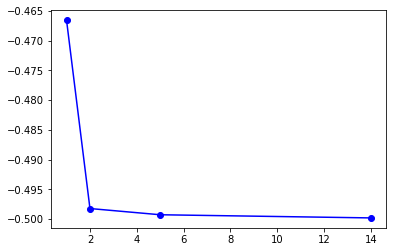

In [9]:
# number_basis_functions = [1, 2, 5, 14]
# hydrogen_atom_energy = [-0.4665818495572753, -0.49823291072907, -0.49927840341958, -0.4998098113018429]

plt.plot(number_basis_functions, hydrogen_atom_energy, 'b-o')
plt.show()

Now evaluate the complete basis set (CBS) energy according to this extrapolation formula:

Helgaker's 2-point extrapolation
* $E_x = E_{\text{CBS}} + \beta e^{-\alpha x}$
* $\alpha=1.63$
* $E_x$ is energy computed in a given basis set
* $x$ is zeta level of that basis
* $\beta$ and $E_{\text{CBS}}$ are unknowns. Latter is target

### Method 1: by hand

In [10]:
psi4.core.clean_variables()
psi4.core.clean_options()
psi4.core.clean()

psi4.set_output_file("cbs_1.out", True)

hatom = psi4.geometry("""
0 2  # neutral atom, doublet multiplicity
H
""")

psi4.set_options({'reference': 'uhf',
                  'basis': 'cc-pvdz'})

eLO = psi4.energy('hf')

print('eLO =', eLO)

psi4.core.clean_variables()
psi4.core.clean_options()
psi4.core.clean()

psi4.set_options({'reference': 'uhf',
                  'basis': 'cc-pvtz'})

eHI = psi4.energy('hf')

print('eHI =', eHI)



# %%writefile cbs_1.in
# molecule hatom {
# 0 2  # neutral atom, doublet multiplicity
# H
# }

# set reference uhf

# set basis cc-pvDZ
# energy('hf')
# print_variables()

# clean()

# set basis cc-pvtz
# energy('hf')
# print_variables()

('eLO =', -0.4992784034195832)
('eHI =', -0.4998098113010459)


In [ ]:
# eLO = -0.499278403420
# eHI = -0.499809811302
# do math
eCBS =

### Method 2: by python

In [11]:
psi4.core.clean_variables()
psi4.core.clean_options()
psi4.core.clean()

psi4.set_options({'reference': 'uhf',
                  'basis': 'cc-pvdz'})

eLO = psi4.energy('hf')

print('eLO =', eLO)

psi4.core.clean_variables()
psi4.core.clean_options()
psi4.core.clean()

psi4.set_options({'reference': 'uhf',
                  'basis': 'cc-pvtz'})

eHI = psi4.energy('hf')

print('eHI =', eHI)


# jobs over. now post-processing
zLO = 2  # cc-pvdz is double-zeta
zHI = 3  # cc-pvtz is triple-zeta
alpha = 1.63

import math
beta = (eHI - eLO) / (math.exp(-1 * alpha * zLO) * (math.exp(-1 * alpha) - 1))
eCBS = eHI - beta * math.exp(-1 * alpha * zHI)

print 'LO', zLO, eLO
print 'HI', zHI, eHI
print 'CBS', eCBS

('eLO =', -0.4992784034195832)
('eHI =', -0.49980981130104585)
LO 2 -0.49927840342
HI 3 -0.499809811301
CBS -0.499939300605


### Method 3: by Psi4 internal wrapper

In [12]:
Edtz = psi4.energy('hf/cc-pv[dt]z')

print('Edtz =', Edtz)

('Edtz =', -0.499939300605157)


**Q.** How do the results compare between your hand-computed and Psi4-computed figures?

## B. Optimization & Frequency Application: rotational barriers

### 1. Potential Energy Curve

**Q.** Take an ethane molecule and trace its potential energy as a function of rotation up to 120$^\circ$ around the C–C single bond. Why choose 120$^\circ$? Would more or less yield more information?

In [13]:
import collections
answers = collections.OrderedDict()


psi4.core.clean_variables()
psi4.core.clean_options()
psi4.core.clean()

# %%writefile pec.in

eth = psi4.geometry("""
C
C  1  r2
H  1  r3  2  a3
H  1  r4  2  a4  3  d4
H  1  r5  2  a5  3  d5

H  2  r6  1  a6  3  d6
H  2  r7  1  a7  3  d7
H  2  r8  1  a8  3  d8

r2= 1.5193
r3= 1.1103
a3= 109.82
r4= 1.1103
a4= 109.82
d4= 240.00
r5= 1.1103
a5= 109.82
d5= 120.00
r6= 1.1103
a6= 109.82
d6=  60.00
r7= 1.1103
a7= 109.82
d7= 300.00
r8= 1.1103
a8= 109.82
d8= 179.97
""")


psi4.set_options({'basis': '3-21g'})

# one full cycle in 15 deg increments
for dih in range(0, 121, 15):
    eth.d6 =  60.0 + dih
    eth.d7 = 300.0 + dih
    eth.d8 = 180.0 + dih
    
    e = psi4.energy('b3lyp')
    answers[dih] = e
    print """{:10} {:16.8f}""".format(dih, e)

         0     -79.39906764
        15     -79.39825268
        30     -79.39626778
        45     -79.39426381
        60     -79.39343153
        75     -79.39426381
        90     -79.39626778
       105     -79.39825268
       120     -79.39907023


In [ ]:
# # cc-pvdz
# answers = {
# 0: -79.8282248783,
# 15: -79.8273852372,
# 30: -79.82534081,
# 45: -79.8232732704,
# 60: -79.822412629,
# 75: -79.8232732704,
# 90: -79.82534081,
# 105: -79.8273852372,
# 120: -79.8282262361,
#     }
# # 3-21g
# answers = {
# 0: -79.4015689083,
# 15: -79.4007537622,
# 30: -79.3987687086,
# 45: -79.3967648645,
# 60: -79.3959327201,
# 75: -79.3967648645, 
# 90: -79.3987687086,
# 105: -79.4007537622,
# 120: -79.4015714988,
# }
# for ang, ene in answers.iteritems():
#     print """{:10} {:16.8f}""".format(ang, ene)

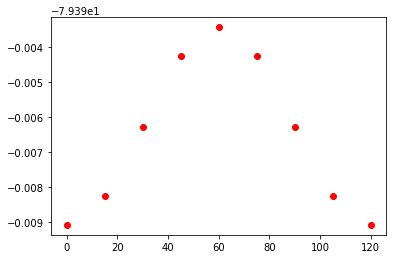

In [14]:
plt.plot(answers.keys(), answers.values(), 'ro')
plt.show()

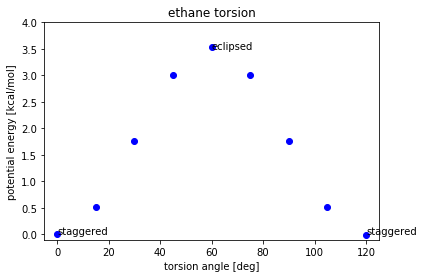

In [15]:
plt.plot(answers.keys(), [(ans - answers[0]) * 627.5095 for ans in answers.values()], 'bo')
plt.axis([-5, 125, -0.1, 4.0])
plt.xlabel('torsion angle [deg]')
plt.ylabel('potential energy [kcal/mol]')
plt.title('ethane torsion')
plt.annotate(r'staggered', xy=(0, 0))
plt.annotate('eclipsed', xy=(60, 3.5))
plt.annotate(r'staggered', xy=(120, 0))
plt.show()

### 2. Optimized curve

The above was a MM-optimized staggered minimum, then a rigid rotation around the C–C single bond. Now try optimizing the endpoints

In [16]:
# %%writefile staggered_opt.in
# molecule eth {
# C
# C  1  r2
# H  1  r3  2  a3
# H  1  r4  2  a4  3  d4
# H  1  r5  2  a5  3  d5

# H  2  r6  1  a6  3  d6
# H  2  r7  1  a7  3  d7
# H  2  r8  1  a8  3  d8

# r2= 1.5193
# r3= 1.1103
# a3= 109.82
# r4= 1.1103
# a4= 109.82
# d4= 240.00
# r5= 1.1103
# a5= 109.82
# d5= 120.00
# r6= 1.1103
# a6= 109.82
# d6=  60.00
# r7= 1.1103
# a7= 109.82
# d7= 300.00
# r8= 1.1103
# a8= 109.82
# d8= 179.97
# }

# set basis 3-21g

e_staggered = psi4.optimize('b3lyp')

Optimizer: Optimization complete!


In [17]:
!grep '~' cbs_1.out

  --------------------------------------------------------------------------------------------- ~
   Step     Total Energy     Delta E     MAX Force     RMS Force      MAX Disp      RMS Disp    ~
  --------------------------------------------------------------------------------------------- ~
    Convergence Criteria    1.00e-06 *    3.00e-04 *             o    1.20e-03 *             o  ~
  --------------------------------------------------------------------------------------------- ~
      1     -79.39907023   -7.94e+01      1.69e-02      6.00e-03 o    5.48e-02      2.37e-02 o  ~
      2     -79.40063587   -1.57e-03      3.65e-03      1.07e-03 o    9.63e-03      4.49e-03 o  ~
      3     -79.40070215   -6.63e-05      2.98e-04 *    8.89e-05 o    1.07e-03 *    4.37e-04 o  ~
  --------------------------------------------------------------------------------------------------------------- ~
   Step         Total Energy             Delta E       MAX Force       RMS Force        MAX Disp    

In [18]:
!tail -100 cbs_1.out

	   10 B(1,2,8)        =    110.913151    -0.000007    -0.032785   110.880366
	   11 B(2,1,3)        =    110.913151    -0.000007    -0.032785   110.880366
	   12 B(2,1,4)        =    110.913151    -0.000007    -0.032785   110.880366
	   13 B(2,1,5)        =    110.913697    -0.000007    -0.032544   110.881153
	   14 B(3,1,4)        =    107.991081     0.000008     0.034363   108.025444
	   15 B(3,1,5)        =    107.991563     0.000008     0.034386   108.025949
	   16 B(4,1,5)        =    107.991563     0.000008     0.034386   108.025949
	   17 B(6,2,7)        =    107.991563     0.000008     0.034386   108.025949
	   18 B(6,2,8)        =    107.991081     0.000008     0.034363   108.025444
	   19 B(7,2,8)        =    107.991563     0.000008     0.034386   108.025949
	   20 D(3,1,2,6)      =    180.000000     0.000000     0.000000   180.000000
	   21 D(3,1,2,7)      =     59.999677    -0.000000    -0.000062    59.999615
	   22 D(3,1,2,8)      =    -60.000645    -0.000000    -0.000125

In [19]:
# %%writefile eclipsed_opt.in
# molecule eth {
# C
# C  1  r2
# H  1  r3  2  a3
# H  1  r4  2  a4  3  d4
# H  1  r5  2  a5  3  d5

# H  2  r6  1  a6  3  d6
# H  2  r7  1  a7  3  d7
# H  2  r8  1  a8  3  d8

# r2= 1.5193
# r3= 1.1103
# a3= 109.82
# r4= 1.1103
# a4= 109.82
# d4= 240.00
# r5= 1.1103
# a5= 109.82
# d5= 120.00
# r6= 1.1103
# a6= 109.82
# d6=  60.00
# r7= 1.1103
# a7= 109.82
# d7= 300.00
# r8= 1.1103
# a8= 109.82
# d8= 179.97
# }

# set basis 3-21g

# eth.d6 = 120.0
# eth.d7 = 360.0
# eth.d8 = 240.0

# set opt_type ts


eth = psi4.geometry("""
C
C  1  r2
H  1  r3  2  a3
H  1  r4  2  a4  3  d4
H  1  r5  2  a5  3  d5

H  2  r6  1  a6  3  d6
H  2  r7  1  a7  3  d7
H  2  r8  1  a8  3  d8

r2= 1.5193
r3= 1.1103
a3= 109.82
r4= 1.1103
a4= 109.82
d4= 240.00
r5= 1.1103
a5= 109.82
d5= 120.00
r6= 1.1103
a6= 109.82
d6=  60.00
r7= 1.1103
a7= 109.82
d7= 300.00
r8= 1.1103
a8= 109.82
d8= 179.97
""")

eth.d6 = 120.0
eth.d7 = 360.0
eth.d8 = 240.0

psi4.set_options({'basis': '3-21g',
                  'opt_type': 'ts'})

e_eclipsed = psi4.optimize('b3lyp')

Optimizer: Optimization complete!


In [ ]:
# ! psi4 eclipsed_opt.in

In [ ]:
! grep '~' cbs_1.out
! tail -100 cbs_1.out

### 3. Thermodynamic corrections

**Q.** What effect on the rotational barrier does vibrational energy have? internal energy? enthalpy? free energy? doubling the temperature?

In [20]:
#%%writefile freqs.in
stag = psi4.geometry("""
    C       
    C             1          r2
    H             1          r3      2          a3
    H             1          r4      2          a4      3          d4
    H             1          r5      2          a5      3          d5
    H             2          r6      1          a6      3          d6
    H             2          r7      1          a7      3          d7
    H             2          r8      1          a8      3          d8

    a3        =  110.9135020855
    a4        =  110.9118973107
    a5        =  110.9132048683
    a6        =  110.9130880760
    a7        =  110.9120167265
    a8        =  110.9134968558
    d4        = -119.9997985457
    d5        =  120.0009727632
    d6        =   59.9988300896
    d7        =  -60.0004071780
    d8        =  179.9988111527
    r2        =    1.5432372377
    r3        =    1.0955417759
    r4        =    1.0955431815
    r5        =    1.0955432326
    r6        =    1.0955475452
    r7        =    1.0955388617
    r8        =    1.0955417809
""")

eclip = psi4.geometry("""
    C       
    C             1          r2
    H             1          r3      2          a3
    H             1          r4      2          a4      3          d4
    H             1          r5      2          a5      3          d5
    H             2          r6      1          a6      3          d6
    H             2          r7      1          a7      3          d7
    H             2          r8      1          a8      3          d8

    a3        =  111.2755161893
    a4        =  111.2755161893
    a5        =  111.2753191064
    a6        =  111.2755161893
    a7        =  111.2755161893
    a8        =  111.2753191064
    d4        = -120.0000441842
    d5        =  119.9999779079
    d6        =  120.0000441842
    d7        =    0.0000000000
    d8        = -119.9999779079
    r2        =    1.5587040608
    r3        =    1.0945195926
    r4        =    1.0945195926
    r5        =    1.0945202683
    r6        =    1.0945195926
    r7        =    1.0945195926
    r8        =    1.0945202683
""")

psi4.set_options({'basis': '3-21g'})

e, wfn = psi4.freq('b3lyp', molecule=stag, return_wfn=True)
psi4.core.clean()

psi4.set_options({'t': 400.0})
psi4.core.thermo(wfn, wfn.frequencies())
psi4.core.clean()

psi4.set_options({'t': 298.15})
e, wfn = psi4.freq('b3lyp', molecule=eclip, return_wfn=True)
psi4.core.clean()

psi4.set_options({'t': 400.0})
psi4.core.thermo(wfn, wfn.frequencies())

 37 displacements needed.
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 25 displacements needed.
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25


0.0

In [21]:
#!tail -1000 freqs.out
!tail -1000 cbs_1.out

	total time  =       1809 seconds =      30.15 minutes

*** tstart() called on ariadne
*** at Thu May  4 15:32:55 2017


         ------------------------------------------------------------
                                   SCF GRAD                          
                          Rob Parrish, Justin Turney,                
                       Andy Simmonett, and Alex Sokolov              
         ------------------------------------------------------------

  ==> Geometry <==

    Molecular point group: cs
    Full point group: Cs

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----------------
           C          0.000000000000    -0.779352030400    -0.000000179575    12.000000000000
           C          0.000000000000     0.779352030400    -0.000000179575    12.000000000000
           H     

In [22]:
! grep '\[K\]' cbs_1.out | grep '[Eh]' | awk '{print $(NF-1)}'

-79.40070120
-79.32483900
-79.32137653
-79.32043235
-79.34796627
-79.40070120
-79.32483900
-79.31954159
-79.31827486
-79.35769108
-79.39638371
-79.32090893
-79.31788354
-79.31693935
-79.34314251
-79.39638371
-79.32090893
-79.31635415
-79.31508742
-79.35236620
-79.40070120
-79.32483894
-79.32137648
-79.32043230
-79.34796621
-79.40070120
-79.32483894
-79.31954155
-79.31827482
-79.35769101
-79.39638371
-79.32090894
-79.31788354
-79.31693935
-79.34314252
-79.39638371
-79.32090894
-79.31635413
-79.31508741
-79.35236622


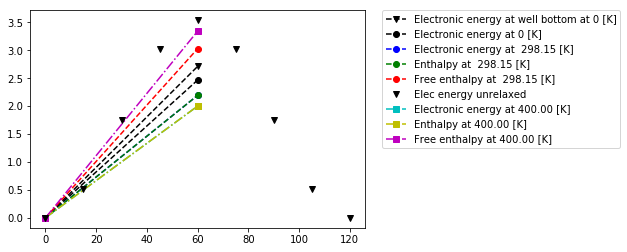

In [23]:
E0, = plt.plot([0, 60], [0, 627.5095 * (-79.39888418 - -79.40320254)], 'k--v', label='Electronic energy at well bottom at 0 [K]')
ZPE, = plt.plot([0, 60], [0, 627.5095 * (-79.32340729 - -79.32733679)], 'k--o', label='Electronic energy at 0 [K]')
E, = plt.plot([0, 60], [0, 627.5095 * (-79.32038186 - -79.32387449)], 'b--o', label='Electronic energy at  298.15 [K]')
H, = plt.plot([0, 60], [0, 627.5095 * (-79.31943767 - -79.32293031)], 'g--o', label='Enthalpy at  298.15 [K]')
G, = plt.plot([0, 60], [0, 627.5095 * (-79.34564088 - -79.35046391)], 'r--o', label='Free enthalpy at  298.15 [K]')
E400, = plt.plot([0, 60], [0, 627.5095 * (-79.31885241 - -79.32203961)], 'c-.s', label='Electronic energy at 400.00 [K]')
H400, = plt.plot([0, 60], [0, 627.5095 * (-79.31758568 - -79.32077288)], 'y-.s', label='Enthalpy at 400.00 [K]')
G400, = plt.plot([0, 60], [0, 627.5095 * (-79.35486460 - -79.36018859)], 'm-.s', label='Free enthalpy at 400.00 [K]')
MM, = plt.plot(answers.keys(), [(ans - answers[0]) * 627.5095 for ans in answers.values()], 'kv', label='Elec energy unrelaxed')
plt.legend(handles=[E0, ZPE, E, H, G, MM, E400, H400, G400], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## C. Fragmentation Application: energy decomposition

adapted from tutorial by C. David Sherrill, Georgia Tech at http://psicode.org/psi4manual/master/tutorial.html#analysis-of-intermolecular-interactions

We can analyze the nature of intermolecular interactions between two molecules, via symmetry-adapted perturbation theory (SAPT) [Jeziorski:1994:1887]. This kind of analysis gives a lot of insight into the nature of intermolecular interactions, and Psi4 makes these computations easier than ever.

For a SAPT computation, the input needs to provide information on two distinct molecules. This is very easy, we just give a Z-matrix or set of Cartesian coordinates for each molecule, and separate the two with two dashes, like this:

In [24]:
#%%writefile sapt.in
# Example SAPT computation for ethene*ethine (i.e., ethylene*acetylene),
# test case 16 from the S22 database


psi4.core.clean_variables()
psi4.core.clean_options()
psi4.core.clean()

psi4.set_output_file("sapt.out", True)

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

psi4.set_options({'basis': 'jun-cc-pvdz', 'freeze_core': 'True'})

psi4.energy('sapt0')

-0.0022355825317401288

To speed up the computation a little, we also tell the SAPT procedure to freeze the core electrons with freeze_core True. The SAPT procedure is invoked with the simple call, energy('sapt0'). This call knows to automatically run two monomer computations and a dimer computation and then use these results to perform the SAPT analysis. The various energy components are printed at the end of the output, in addition to the total SAPT0 interaction energy. An explanation of the various energy components can be found in the review by Jeziorski, Moszynski, and Szalewicz [Jeziorski:1994:1887], and this is discussed in more detail in the SAPT section later in this manual. For now, we’ll note that most of the SAPT energy components are negative; this means those are attractive contributions (the zero of energy in a SAPT computation is defined as non-interacting monomers). The exchange contributions are positive (repulsive). In this example, the most attractive contribution between ethylene and acetylene is an electrostatic term of -2.12 kcal/mol (Elst10,r where the 1 indicates the first-order perturbation theory result with respect to the intermolecular interaction, and the 0 indicates zeroth-order with respect to intramolecular electron correlation). The next most attractive contribution is the Disp20 term (2nd order intermolecular dispersion, which looks like an MP2 in which one excitation is placed on each monomer), contributing an attraction of -1.21 kcal/mol. It is not surprising that the electrostatic contribution is dominant, because the geometry chosen for this example has the acetylene perpendicular to the ethylene, with the acetylene hydrogen pointing directly at the double bond in ethylene; this will be attractive because the H atoms in acetylene bear a partial positive charge, while the electron-rich double bond in ethylene bears a partial negative charge. At the same time, the dispersion interaction should be smaller because the perpendicular geometry does not allow much overlap between the monomers. Hence, the SAPT analysis helps clarify (and quantify) our physical understanding about the interaction between the two monomers.

In [25]:
# tern.py is in the github repo/tarball so adjust path accordingly
import sys
sys.path.append('/Users/loriab/linux/psi4workshop')
import tern

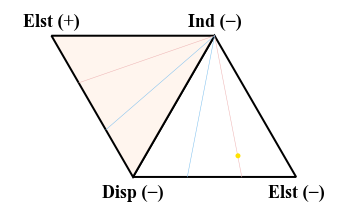

{'pdf': 'tern_.pdf'}

In [26]:
tern.ternary([[-2.11997068, -0.55805356, -1.04937892]])

**Q.** Now try a methane dimer. Where does it appear? Can you find more complexes to fill in other regions of the graph? (Think charged systems, $\pi$/$\pi$ contacts, hydrogen bonds, repulsive complexes.) Some geometries to try here: https://raw.githubusercontent.com/psi4/psi4/master/share/databases/A24.py

In [27]:
#%%writefile sapt2.in

psi4.core.clean_variables()
psi4.core.clean_options()
psi4.core.clean()

psi4.set_output_file("sapt2.out", True)

psi4.geometry("""
0 1
C   0.000000  -0.000140   1.859161
H  -0.888551   0.513060   1.494685
H   0.888551   0.513060   1.494685
H   0.000000  -1.026339   1.494868
H   0.000000   0.000089   2.948284
--
0 1
C   0.000000   0.000140  -1.859161
H   0.000000  -0.000089  -2.948284
H  -0.888551  -0.513060  -1.494685
H   0.888551  -0.513060  -1.494685
H   0.000000   1.026339  -1.494868
""")

psi4.set_options({'basis': 'jun-cc-pvdz', 'freeze_core': 'True'})

psi4.energy('sapt0')

-0.0002692698888332511

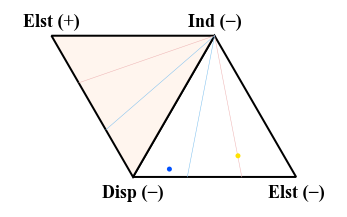

{'pdf': 'tern_.pdf'}

In [28]:
tern.ternary([[-2.11997068, -0.55805356, -1.04937892],
              [-0.13986987, -0.03988538, -0.53624514]])